# Semantic segmentation test

---

**Author:** [rodoart](https://github.com/rodoart/)<br>
**Date created:** 2021/08/05<br>
**Last modified:** 2021/08/05<br>
**Description:** 
Trying DVC+Google Drive. 
Testing the library [semantic-segmentation by sithu31296](https://github.com/sithu31296/semantic-segmentation)


In [2]:
TYPE_OF_EXECUTION = 'colab'
# Options: 'alone' or 'normal'

## Libraries

In [55]:
import sys
import subprocess
import pkg_resources

required = {
    'dvc', 'dvc[gdrive]', 'gdown', 'torch', 'Pillow'
}
installed = {pkg.key for pkg in pkg_resources.working_set}
missing = required - installed

if missing:
    python = sys.executable
    subprocess.check_call([python, '-m', 'pip', 'install', *missing], stdout=subprocess.DEVNULL)


## Download repository files

In [ ]:
GITHUB_PULL_NEEDED = True

In [ ]:
from os import chdir

### GitHub

In [4]:
if TYPE_OF_EXECUTION in ('alone', 'colab') and GITHUB_PULL_NEEDED:
  # The created key is moved to the folder where it is required.
  !mkdir -p /root/.ssh/
  !cp /content/id_rsa.pub /root/.ssh/id_rsa.pub 
  !cp /content/id_rsa /root/.ssh/id_rsa 
  # Permissions change for more security.
  !chmod 600 ~/.ssh/id_rsa
  !chmod 600 ~/.ssh/id_rsa.pub
  # Associate the key to GitHub.com
  !ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts

  # Change them to your credentials.
  !git config --global user.email "rodoart@ciencias.unam.mx"
  !git config --global user.name "rodoart"

  # Clone the repo.
  !git clone git@github.com:rodoart/pet-surveillance.git

  # Change the remote to your branch.
  chdir('pet-surveillance')
  !git remote remove origin
  !git remote add origin git@github.com:rodoart/pet-surveillance.git

elif TYPE_OF_EXECUTION in ('alone', 'colab'):
  !git clone https://github.com/rodoart/pet-surveillance
  chdir('pet-surveillance')

else:
  chdir('..')

Cloning into 'pet-surveillance'...
remote: Enumerating objects: 350, done.
remote: Counting objects: 100% (350/350), done.
remote: Compressing objects: 100% (217/217), done.
remote: Total 350 (delta 147), reused 318 (delta 115), pack-reused 0
Receiving objects: 100% (350/350), 9.72 MiB | 21.92 MiB/s, done.
Resolving deltas: 100% (147/147), done.


### Path function

In [6]:
import sys
sys.path.append('.')

In [7]:
from pet_surveillance.utils.paths import make_dir_function, is_valid

In [8]:
local_dir = make_dir_function()

### DVC

Note: the function will ask for access in the browser, you have to click on the link, authorize DVC to use Google Drive and copy the code.


In [9]:
processed_data_set_path = local_dir('data','processed', 'semantic_segmentation', 'unity_residential_interiors', 'val_images')

In [12]:
if not is_valid(processed_data_set_path):
  !dvc pull $processed_data_set_path

Se truncaron las últimas líneas 5000 del resultado de transmisión.




100% 2.89M/2.89M [00:01<00:00, 1.67MB/s{'info': ''}]                       






Transferring:  39% 118/301 [00:25<00:36,  5.04file/s{'info': ''}]






!






  0%|          |98239904e9e708460e447dfd38b57b     0.00/? [00:00<?,        ?B/s]
9afc9ad9c00e1b966aaa3fd2302ff6:   0% 0.00/3.05M [00:00<?, ?B/s{'info': ''}]     






98239904e9e708460e447dfd38b57b:   0% 0.00/2.82M [00:00<?, ?B/s{'info': ''}]     





100% 2.97M/2.97M [00:01<00:00, 1.90MB/s{'info': ''}]                       





Transferring:  40% 119/301 [00:26<00:56,  3.21file/s{'info': ''}]





!





  0%|          |e2bdf08f79581f5b9a62f06c5fbed3     0.00/? [00:00<?,        ?B/s]





e2bdf08f79581f5b9a62f06c5fbed3:   0% 0.00/2.82M [00:00<?, ?B/s{'info': ''}]     




100% 2.53M/2.53M [00:01<00:00, 1.66MB/s{'info': ''}]                       




Transferring:  40% 120/301 [00:26<00:57,  3.15file/s{'info': ''}]




!




  0%|          |c7cdef96389

## Loading and installing semantic-segmentation library

### Setup

In [13]:
clone_dir = local_dir('tmp', 'semantic_segmentation' )

In [14]:
!git clone https://github.com/sithu31296/semantic-segmentation $clone_dir

Cloning into '/content/pet-surveillance/tmp/semantic_segmentation'...
remote: Enumerating objects: 792, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 792 (delta 11), reused 39 (delta 11), pack-reused 753
Receiving objects: 100% (792/792), 55.00 MiB | 30.18 MiB/s, done.
Resolving deltas: 100% (462/462), done.


In [15]:
%pip install -e $clone_dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/pet-surveillance/tmp/semantic_segmentation
     |████████████████████████████████| 50 kB 2.9 MB/s 
     |████████████████████████████████| 42 kB 894 kB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20220512-py3-none-any.whl size=61288 sha256=1b5a41bbee56c5628317f8ceace82005596cf4ecfd7fd8f44722e19d9ea2ecab
  Stored in directory: /root/.cache/pip/wheels/68/20/f9/a11a0dd63f4c13678b2a5ec488e48078756505c7777b75b29e
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31549 sha256=7593e2188f04f19e39d25d680adfd7ecc1f803927dbe8860ca739dd8ccec2809
  Stored in directory: /root/.cache/pip/wheels/aa/cc/ed/ca4e88beef656b01c84b9185196513ef2faf74a5a379b043a7
Successfully built fvcore iopath
  Running setup.py develop for semseg


In [16]:
import torch
from torchvision import io
from torchvision import transforms as T
from PIL import Image

def show_image(image):
    if image.shape[2] != 3: image = image.permute(1, 2, 0)
    image = Image.fromarray(image.numpy())
    return image

### Show Available Pretrained Models

In [17]:
sys.path.append(str(clone_dir))
import semseg

In [18]:
from semseg import show_models
show_models()

  No.  Model Names
-----  -------------
    1  SegFormer
    2  Lawin
    3  SFNet
    4  BiSeNetv1
    5  DDRNet
    6  FCHarDNet
    7  BiSeNetv2


### Load a Pretrained Model

Download a pretrained model's weights from the result table (ADE20K, CityScapes, ...) and put it in `checkpoints/pretrained/model_name/`.

In [19]:
import gdown
from pathlib import Path

In [20]:
ckpt = local_dir('models','segformer')
ckpt.mkdir(exist_ok=True, parents=True)

url = 'https://drive.google.com/uc?id=1-OmW3xRD3WAbJTzktPC-VMOF5WMsN8XT'
segformer_path = ckpt.joinpath('segformer.b3.ade.pth')

gdown.download(url, str(segformer_path), quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1-OmW3xRD3WAbJTzktPC-VMOF5WMsN8XT
To: /content/pet-surveillance/models/segformer/segformer.b3.ade.pth
100%|██████████| 190M/190M [00:02<00:00, 75.2MB/s]


'/content/pet-surveillance/models/segformer/segformer.b3.ade.pth'

In [21]:
from semseg.models import *

model = eval('SegFormer')(
    backbone='MiT-B3',
    num_classes=150
)

try:
    model.load_state_dict(torch.load(segformer_path, map_location='cpu'))
except:
    print("Download a pretrained model's weights from the result table.")
model.eval()

print('Loaded Model')

Loaded Model


### Simple Image Inference

#### Load Image

In [22]:
image_path = local_dir('data','processed','semantic_segmentation','unity_residential_interiors','val_images','1027.png')

torch.Size([3, 1080, 1920])


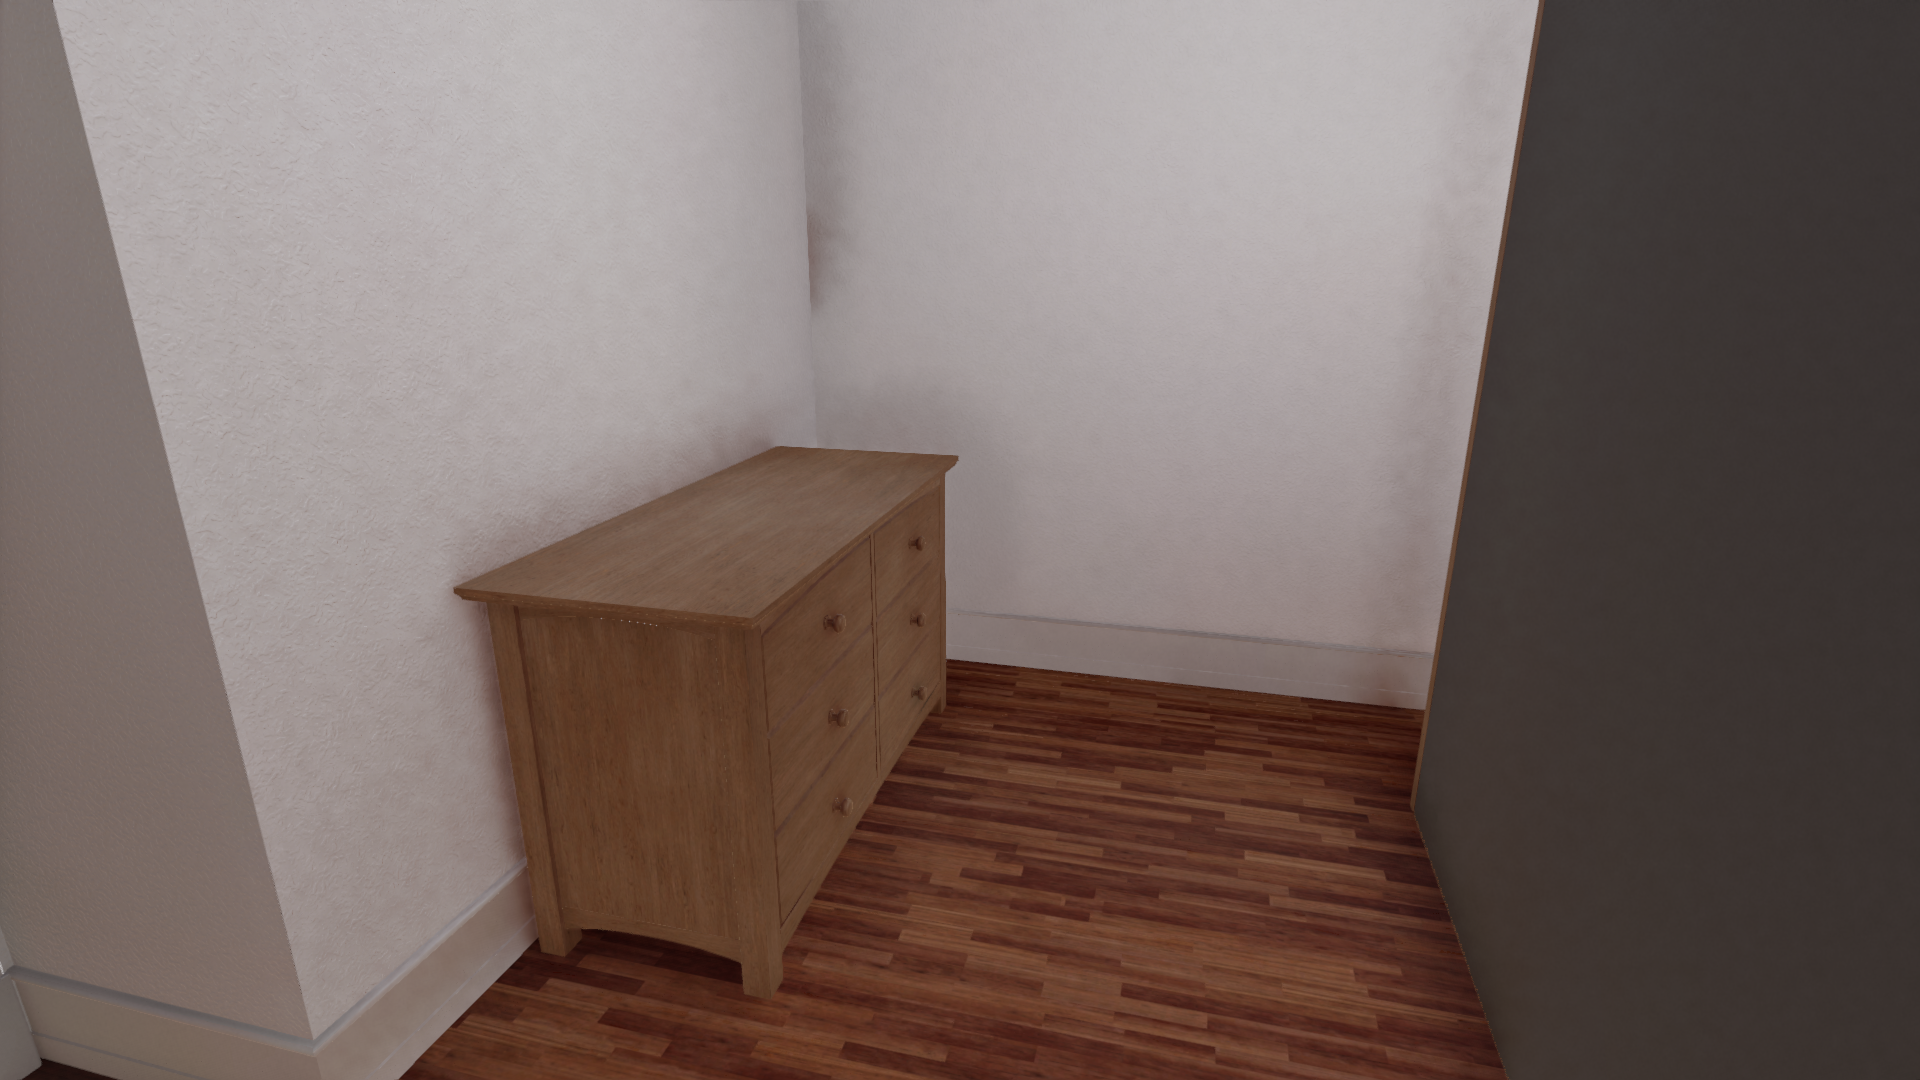

In [23]:
image = io.read_image(str(image_path))
image = image[:3,:,:]
print(image.shape)
original_shape = image.shape[1:]
show_image(image)

#### Preprocess

In [24]:
# resize
image = T.Resize((512, 512))(image)
# scale to [0.0, 1.0]
image = image.float() / 255
# normalize
image = T.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))(image)
# add batch size
image = image.unsqueeze(0)
image.shape

torch.Size([1, 3, 512, 512])

### Model Forward

In [25]:
with torch.inference_mode():
    seg = model(image)
seg.shape

torch.Size([1, 150, 512, 512])

#### Postprocess

In [26]:
seg = seg.softmax(1).argmax(1).to(int)
seg.unique()

tensor([ 0,  3, 10, 44])

In [27]:
from semseg.datasets import *

palette = eval('ADE20K').PALETTE

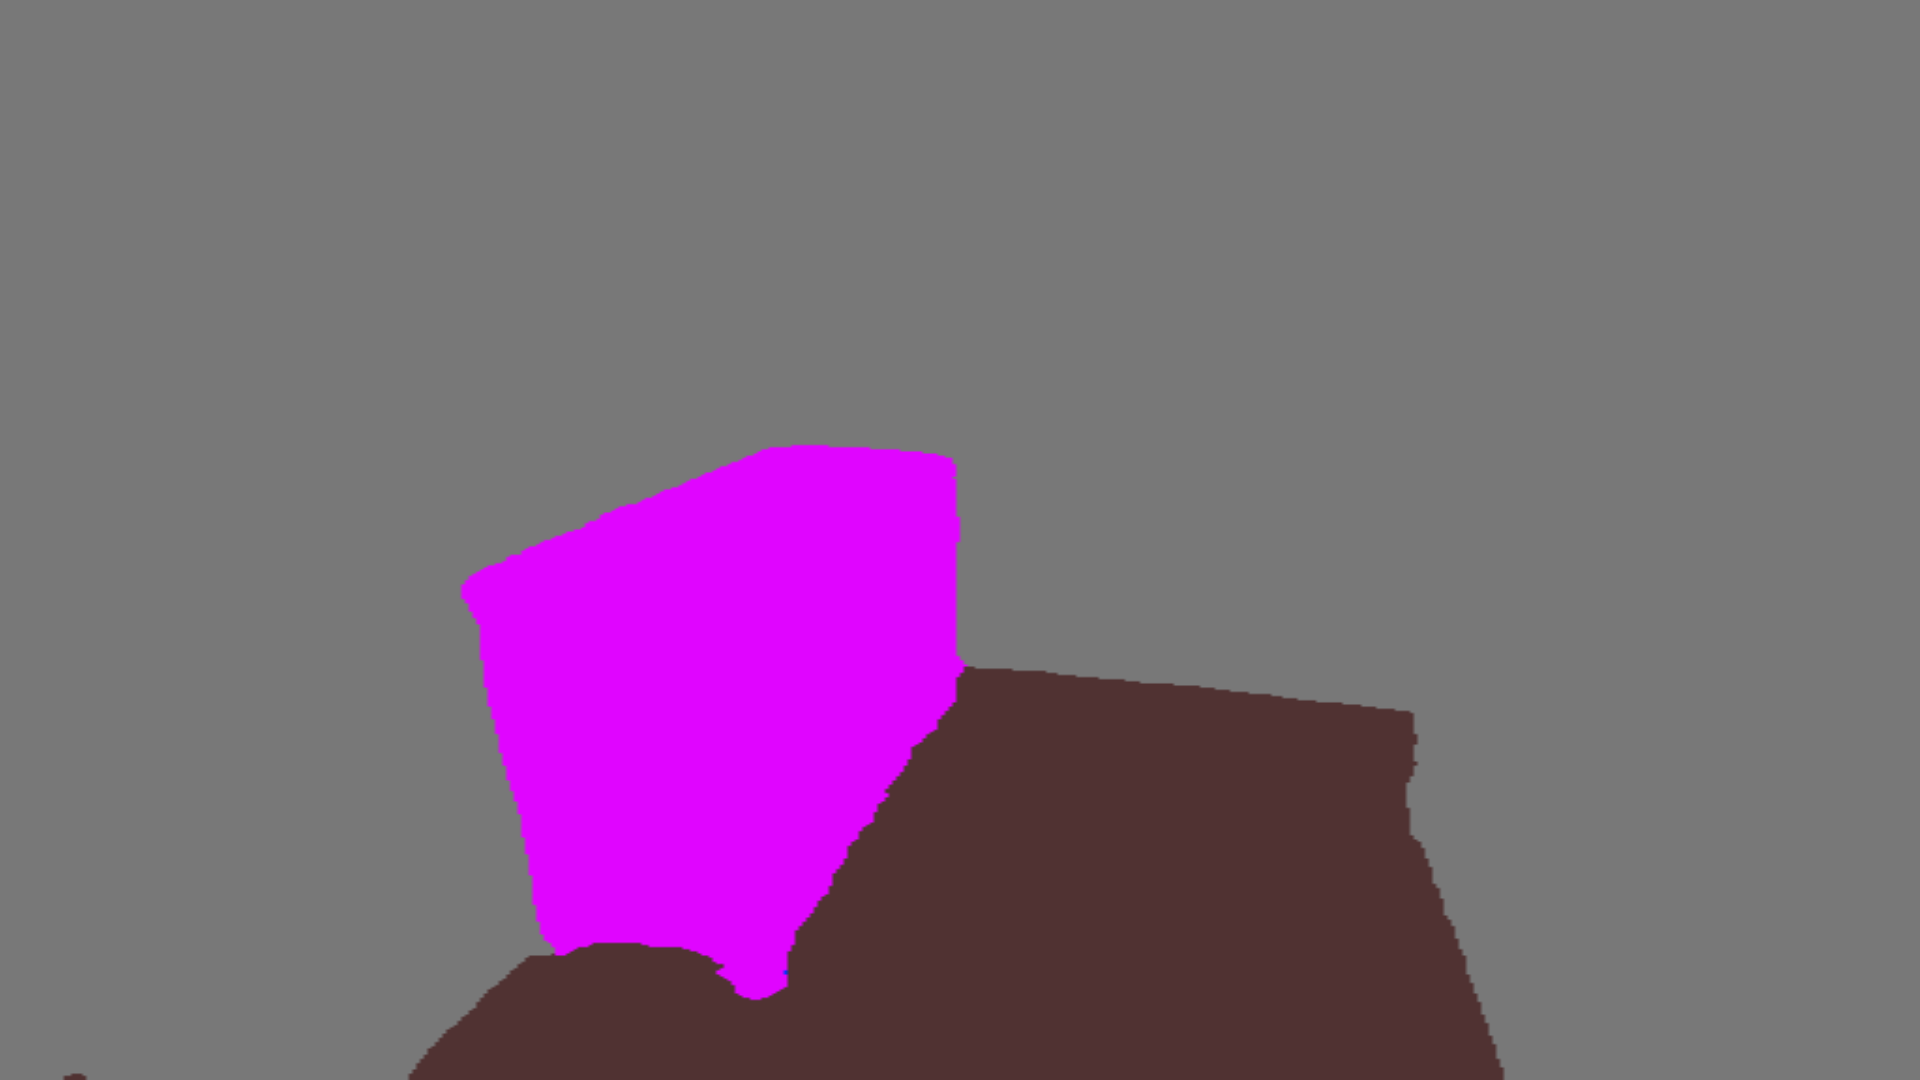

In [28]:
seg_map = palette[seg].squeeze().to(torch.uint8)
img = show_image(seg_map)
T.Resize(original_shape)(img)

## Making functions

In [37]:
def load_image(image_path):
  image = io.read_image(str(image_path))
  if str(image_path).endswith('png'):
    image = image[:3,:,:]
  
  return image

In [38]:
def preprocess_image(image):
  # resize
  image_ = T.Resize((512, 512))(image)
  # scale to [0.0, 1.0]
  image_ = image_.float() / 255
  # normalize
  image_ = T.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))(image_)
  # add batch size
  image_ = image_.unsqueeze(0)

  return image_

In [48]:
def predict_labels(image, model):  
  with torch.inference_mode():
      seg = model(image)

  seg = seg.softmax(1).argmax(1).to(int) 

  palette = eval('ADE20K').PALETTE

  seg_map = palette[seg].squeeze().to(torch.uint8)

  return seg_map
  


### Procesing validation dataset

In [65]:
from os import listdir, makedirs
from shutil import rmtree

In [29]:
images_path = local_dir('data','processed','semantic_segmentation','unity_residential_interiors','val_images')
predicted_labels_path = local_dir('data','processed','semantic_segmentation','unity_residential_interiors','segformer_predicted_val_images')

In [70]:
rmtree(predicted_labels_path)
makedirs(predicted_labels_path, exist_ok=True)

In [71]:
image_names = [name[:-4] for name in listdir(images_path) if name.endswith('.png')]

In [72]:
for name in image_names:
  origin_path = images_path.joinpath(f'{name}.png')
  destiny_path = predicted_labels_path.joinpath(f'{name}.png')
  
  image = load_image(origin_path)
  original_shape = image.shape[1:]

  image = preprocess_image(image)

  seg_map = predict_labels(image, model)
  img = show_image(seg_map)
  #img = T.Resize(original_shape)(img)
  img.save(str(destiny_path))
  
  



## Syncing files to DVC and GitHub

In [73]:
!dvc add $predicted_labels_path

⠸ Checking graph
Adding...:   0% 0/1 [00:00<?, ?file/s{'info': ''}]
!
Computing file/dir hashes (only done once)          |0.00 [00:00,      ?md5/s]
Computing file/dir hashes (only done once)          |85.0 [00:00,    843md5/s]
Computing file/dir hashes (only done once)          |188 [00:00,    834md5/s] 
Computing file/dir hashes (only done once)          |285 [00:00,    889md5/s]
                                                                             
678d5d3a69189d2ff94b4ced0e0b22.dir:   0% 0.00/19.6k [00:00<?, ?B/s]
678d5d3a69189d2ff94b4ced0e0b22.dir:   0% 0.00/19.6k [00:00<?, ?B/s{'info': ''}]
678d5d3a69189d2ff94b4ced0e0b22.dir:   0% 0.00/19.6k [00:00<?, ?B/s{'info': ''}]
                                                                               
!
  0% |          |0/? [00:00<?,    ?files/s]
                                           
Transferring:   0% 0/301 [00:00<?, ?file/s]
Transferring:   0% 0/301 [00:00<?, ?file/s{'info': ''}]
Transferring:  28% 85/301 [00:00<00:00,

In [74]:
!git add data/processed/semantic_segmentation/unity_residential_interiors/segformer_predicted_val_images.dvc data/processed/semantic_segmentation/unity_residential_interiors/.gitignore


In [79]:
!git commit -m 'Added predicted labels with Segform.'

[master a1646e2] Added predicted labels with Segform.
 2 files changed, 6 insertions(+)
 create mode 100644 data/processed/semantic_segmentation/unity_residential_interiors/segformer_predicted_val_images.dvc


In [80]:
!git pull

Already up to date.


In [97]:
!git push origin master

Counting objects: 8, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (7/7), done.
Writing objects: 100% (8/8), 920 bytes | 920.00 KiB/s, done.
Total 8 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To github.com:rodoart/pet-surveillance.git
   b4290aa..a1646e2  master -> master


In [98]:
!dvc push

Se truncaron las últimas líneas 5000 del resultado de transmisión.
100% 7.05k/7.05k [00:00<00:00, 24.3kB/s{'info': ''}]                       


!


  0%|          |a40f80e52dec503e2b11c15ec035fe     0.00/? [00:00<?,        ?B/s]


a40f80e52dec503e2b11c15ec035fe:   0% 0.00/4.61k [00:00<?, ?B/s{'info': ''}]     






Transferring:  22% 67/301 [00:14<00:52,  4.43file/s{'info': ''}]



                                                    

                                                    


100% 4.61k/4.61k [00:00<00:00, 24.9kB/s{'info': ''}]                       

!

  0%|          |69c4b752017fd6c2ebf47b737d94fb     0.00/? [00:00<?,        ?B/s]

69c4b752017fd6c2ebf47b737d94fb:   0% 0.00/3.12k [00:00<?, ?B/s{'info': ''}]     



!



  0%|          |0eaffa69cf71c1731934cbe12c14bf     0.00/? [00:00<?,        ?B/s]



0eaffa69cf71c1731934cbe12c14bf:   0% 0.00/5.49k [00:00<?, ?B/s{'info': ''}]     




Transferring:  23% 70/301 [00:14<00:39,  5.80file/s{'info': ''}]

100% 3.12k/3.12k [